In [18]:
# Import libraries
import matplotlib.style
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import linregress
#matplotlib.style.available
matplotlib.style.use('seaborn-v0_8-bright')


In [3]:
# Define path name
folder_path = "XRAY_files/XRAY_Dose_new/"

# Create file name
def filename_dose(folder, type, z, voltage, current):
    """ Create file name for dosing

    Args:
        folder (str): The folder path
        type (str): Either mean or variance
        z (int): The height of the X-Ray source, 5, 75, 10
        voltage (int): The bias voltage of the X-Ray source
        current (int): The current of the X-Ray source

    Returns:
        filepath : string containing the system path
    """
    return folder+f"Frame_{type}_{z}cm_{voltage}kV_{current}mA.csv"

In [4]:
# Test the function
test_z = 5
test_volt = 20
test_amp = 20
test_path = filename_dose(folder_path, "mean", test_z, test_volt, test_amp)
print(test_path)

XRAY_files/XRAY_Dose_new/Frame_mean_5cm_20kV_20mA.csv


In [5]:
# Try retrieving data
test_array = np.loadtxt(test_path, delimiter=',')
#print(test_array)

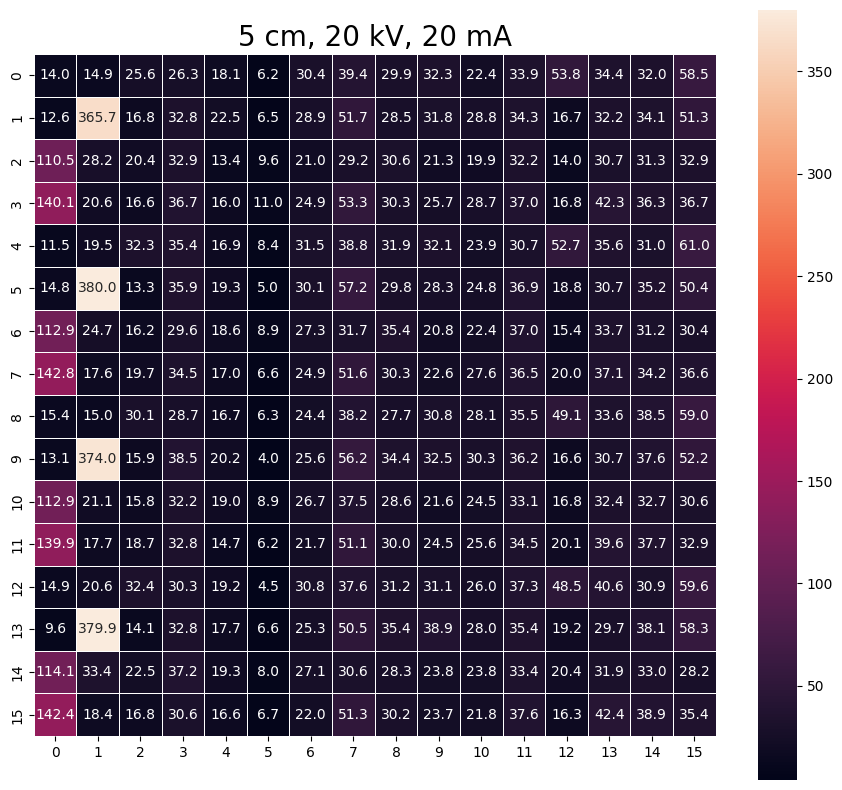

In [6]:
# Test matplotlib plotting, this is for the pixel values
Fig, ax = plt.subplots(1,1, figsize = (11,10))
ax = sns.heatmap(test_array, annot=True, linewidths=.5, fmt = ".1f")
ax.set_title(f"{test_z} cm, {test_volt} kV, {test_amp} mA", fontsize = 20)
ax.set_aspect('equal')
plt.show()

20 20
20 40
30 20
30 40
40 20
40 40


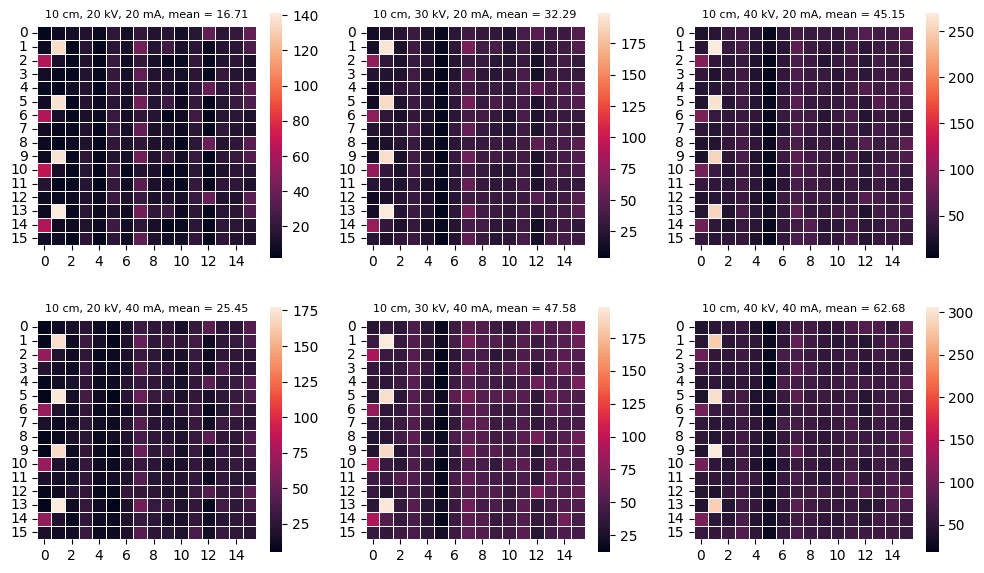

In [7]:
#volt_array = [20,30,40]
volt_array = [20,30, 40]
#amp_array = [20,40]
amp_array = [20,40]
imz = 10
mean_array = np.zeros(6)
var_array = np.zeros(6)

Fig_all, ax_all = plt.subplots(nrows=len(amp_array), ncols=len(volt_array), figsize = (12,7))
count = 0
for i, volt in enumerate(volt_array):
    for j, amp in enumerate(amp_array):
        print(volt, amp)
        
        impath = filename_dose(folder_path, "mean", imz, volt, amp)
        varpath = filename_dose(folder_path, "var", imz, volt, amp)
        immean = np.loadtxt(impath, delimiter=',')
        imvar = np.loadtxt(varpath, delimiter=',')
        total_mean = np.sum(immean)/256
        total_var = np.sum(imvar)/256
        
        mean_array[count] = total_mean
        var_array[count] = total_var
        count += 1
        
        sns.heatmap(immean, linewidths=.5, ax = ax_all[j,i])
        ax_all[j][i].set_title(f"{imz} cm, {volt} kV, {amp} mA, mean = {total_mean:.2f}", fontsize = 8)
        ax_all[j][i].set_aspect('equal')

In [15]:
# Try to match things with the dose
dose_rate_10cm = np.array([84.8, 169.6, 225.02, 450.04, 363.9, 727.8])
center_dose_rate_10cm = dose_rate_10cm*0.9 # 10 percent less dose than the peak.
dose_10cm = center_dose_rate_10cm*((10.5e-3)/3600) * 1000 # in rad



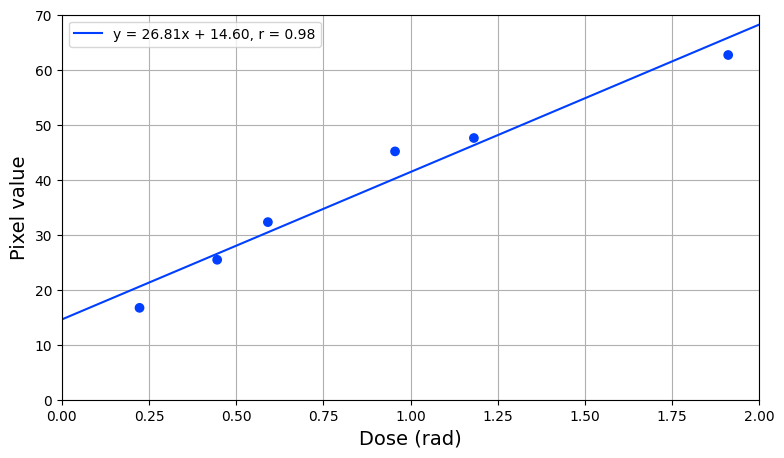

In [23]:
# Try to calibrate the dose
Fig_calib, ax_calib = plt.subplots(1,1, figsize = (9,5))
ax_calib.scatter(dose_10cm, mean_array, linestyle = '')
#ax_calib.errorbar(center_dose_rate_10cm, mean_array, yerr = var_array, linestyle = '')
ax_calib.grid('True')
lin_res = linregress(dose_10cm,  mean_array)
ax_calib.axline([0,lin_res.intercept], slope = lin_res.slope, label = f"y = {lin_res.slope:.2f}x + {lin_res.intercept:.2f}, r = {lin_res.rvalue:.2f}")
ax_calib.set_xlabel("Dose (rad)", fontsize = 14)
ax_calib.set_ylabel("Pixel value", fontsize = 14)
ax_calib.set_xlim([0,2])
ax_calib.set_ylim([0, 70])
ax_calib.legend()